In [14]:
import cv2, pathlib
import numpy as np
import matplotlib.pylab as plt

In [21]:
VIDEO_DIR = "/data/kiat/UR_fall_detection/original"

In [22]:
def read_video(path):
    cap = cv2.VideoCapture(path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return np.array(frames), fps

def parse_frames(frames):
    height, width, layers = frames[0].shape
    frames = frames[:, :, width//2:]
    return frames

def write_video(frames, fps, path):
    height, width, layers = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(path, fourcc, fps, (width, height))
    for frame in frames:
        out.write(frame)
    out.release()

In [39]:
for path in pathlib.Path(VIDEO_DIR).glob("*.mp4"):
    frames, fps = read_video(str(path))
    frames = parse_frames(frames)
    # print(f"{str(path.parent.parent)}/parsed/parsed_{path.name}")
    write_video(frames, fps, f"{str(path.parent.parent)}/parsed/parsed_{path.name}")

In [ ]:
path = "/data/kiat/UR_fall_detection/original/fall-26-cam0.mp4"

In [27]:
def read_video(path):
    cap = cv2.VideoCapture(path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return np.array(frames), fps

def parse_frames(frames):
    height, width, layers = frames[0].shape
    frames = frames[:, :, width//2:]
    return frames

def write_video(frames, fps, path):
    height, width, layers = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(path, fourcc, fps, (width, height))
    for frame in frames:
        out.write(frame)
    out.release()

In [28]:
frames, fps = read_video(path)
frames1 = parse_frames(frames)
frames.shape, frames1.shape, fps

((61, 240, 640, 3), (61, 240, 320, 3), 30.0)

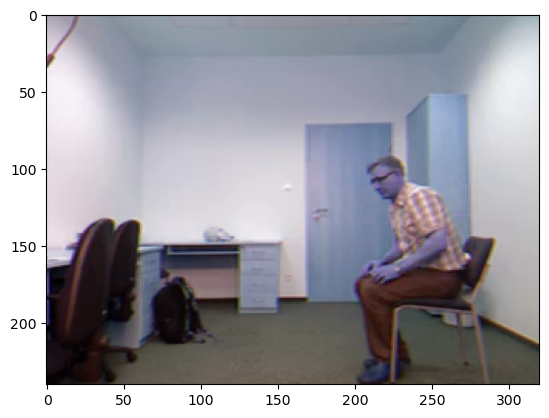

In [29]:
plt.imshow(frames1[0])

In [ ]:
write_video(frames1, fps, "./test_parse.mp4")